In [1]:
library(caret)
library(magrittr)

Loading required package: ggplot2

Loading required package: lattice



In [2]:
base_path <- getwd()
setwd(base_path)

In [3]:
path <- paste(base_path, "Datasets/wine.csv", sep = "/")

In [4]:
wine = read.table(path, sep = ",", header = TRUE)
head(wine)

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
1,1952,7.4950,600,17.1167,160,31,43183.57
2,1953,8.0393,690,16.7333,80,30,43495.03
3,1955,7.6858,502,17.1500,130,28,44217.86
4,1957,6.9845,420,16.1333,110,26,45152.25
5,1958,6.7772,582,16.4167,187,25,45653.81
6,1959,8.0757,485,17.4833,187,24,46128.64


In [5]:
head(wine)
dim(wine)

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
1,1952,7.4950,600,17.1167,160,31,43183.57
2,1953,8.0393,690,16.7333,80,30,43495.03
3,1955,7.6858,502,17.1500,130,28,44217.86
4,1957,6.9845,420,16.1333,110,26,45152.25
5,1958,6.7772,582,16.4167,187,25,45653.81
6,1959,8.0757,485,17.4833,187,24,46128.64


[1] 27  7

### TIỀN XỬ LÝ DỮ LIỆU

In [6]:
# Kiểm tra dữ liệu
str(wine) # Xem cấu trúc dữ liệu
summary(wine) # Xem tổng quan về dữ liệu


'data.frame':	27 obs. of  7 variables:
 $ Year       : int  1952 1953 1955 1957 1958 1959 1960 1961 1962 1963 ...
 $ Price      : num  7.5 8.04 7.69 6.98 6.78 ...
 $ WinterRain : int  600 690 502 420 582 485 763 830 697 608 ...
 $ AGST       : num  17.1 16.7 17.1 16.1 16.4 ...
 $ HarvestRain: int  160 80 130 110 187 187 290 38 52 155 ...
 $ Age        : int  31 30 28 26 25 24 23 22 21 20 ...
 $ FrancePop  : num  43184 43495 44218 45152 45654 ...


      Year          Price         WinterRain         AGST        HarvestRain   
 Min.   :1952   Min.   :6.205   Min.   :376.0   Min.   :14.98   Min.   : 38.0  
 1st Qu.:1960   1st Qu.:6.508   1st Qu.:543.5   1st Qu.:16.15   1st Qu.: 88.0  
 Median :1967   Median :6.984   Median :600.0   Median :16.42   Median :123.0  
 Mean   :1967   Mean   :7.042   Mean   :608.4   Mean   :16.48   Mean   :144.8  
 3rd Qu.:1974   3rd Qu.:7.441   3rd Qu.:705.5   3rd Qu.:17.01   3rd Qu.:185.5  
 Max.   :1980   Max.   :8.494   Max.   :830.0   Max.   :17.65   Max.   :292.0  
      Age          FrancePop    
 Min.   : 3.00   Min.   :43184  
 1st Qu.: 9.50   1st Qu.:46856  
 Median :16.00   Median :50650  
 Mean   :16.19   Mean   :50085  
 3rd Qu.:22.50   3rd Qu.:53511  
 Max.   :31.00   Max.   :55110  

In [7]:
# Kiểm tra giá trị thiếu
colSums(is.na(wine))

Year       Price  WinterRain        AGST HarvestRain         Age 
          0           0           0           0           0           0 
  FrancePop 
          0

- Tất cả các cột dữ liệu đang ở dạng num
- Không có dữ liệu nan

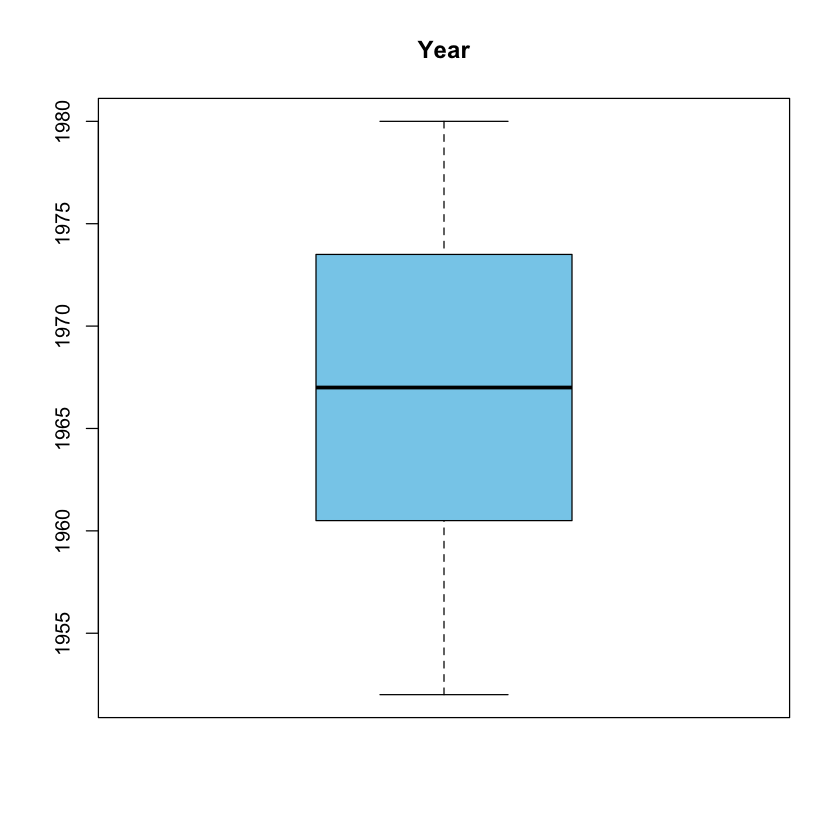

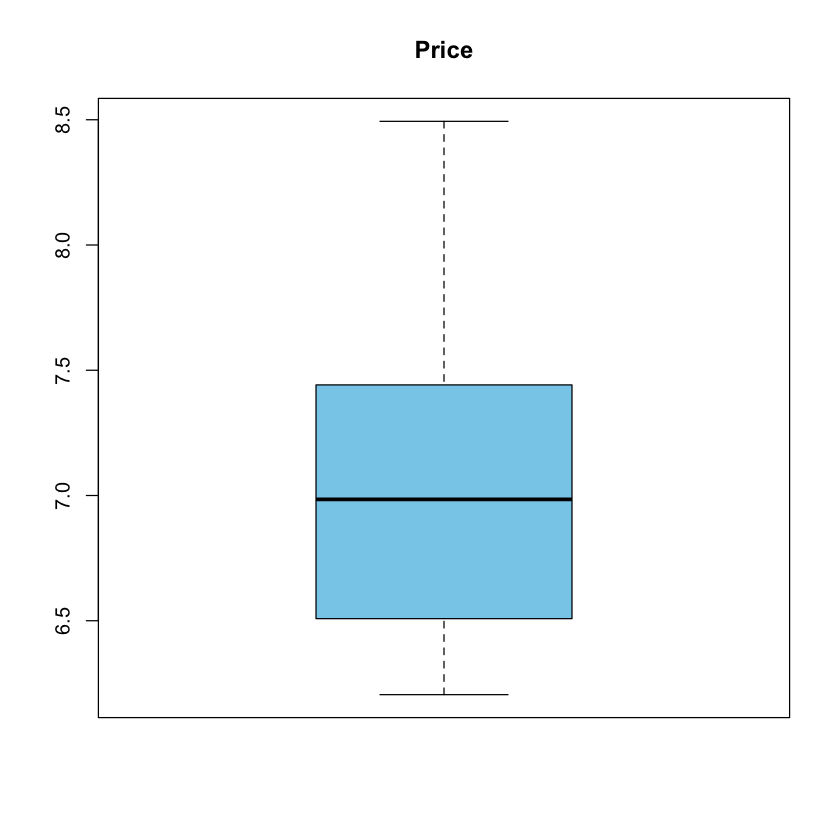

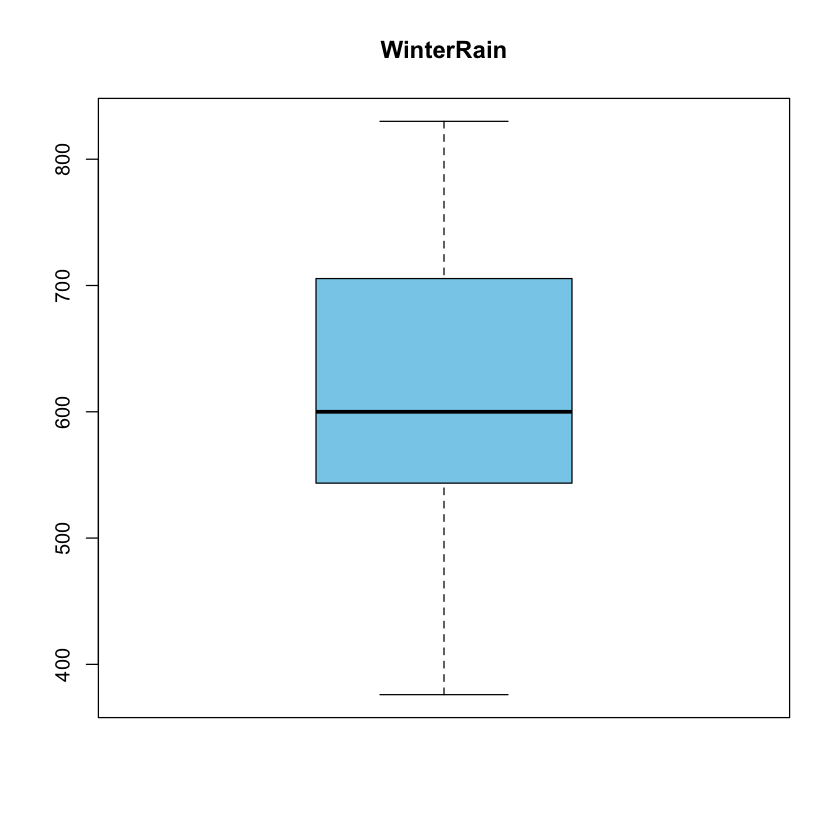

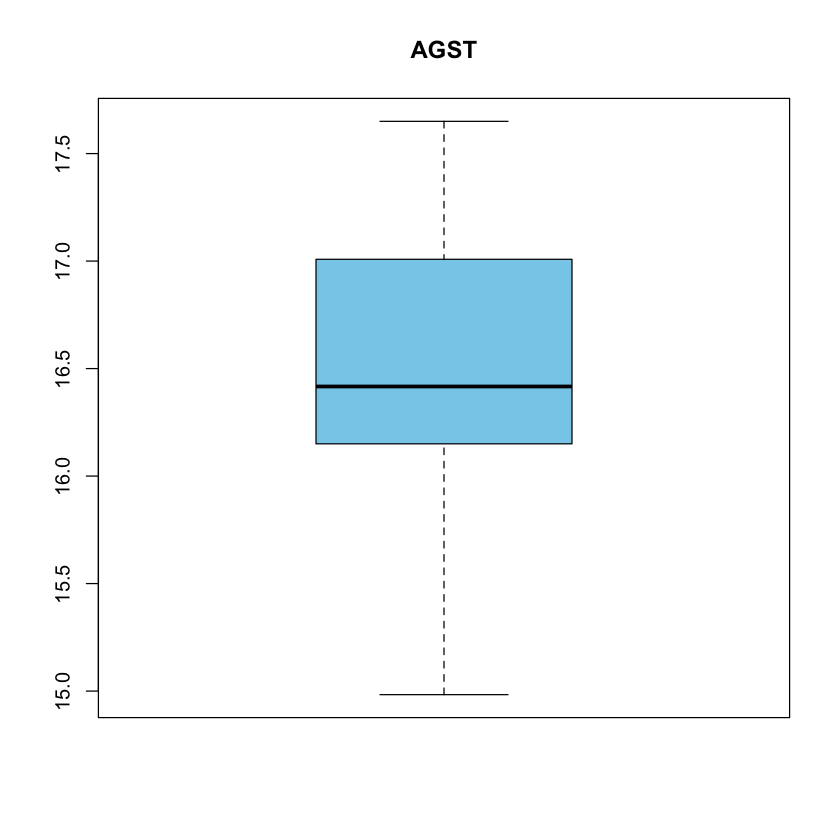

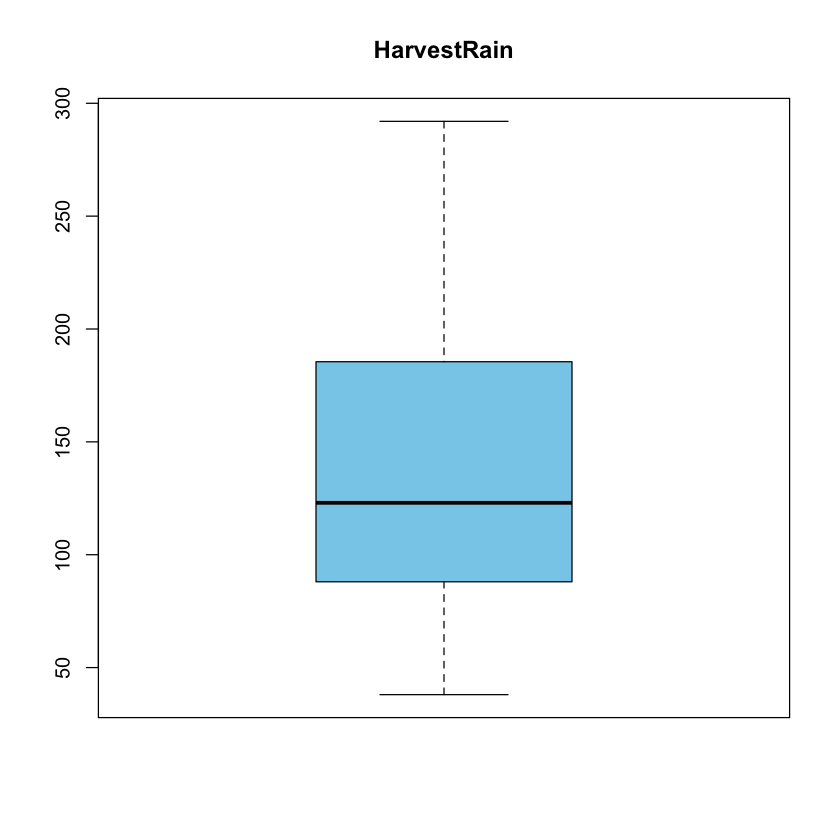

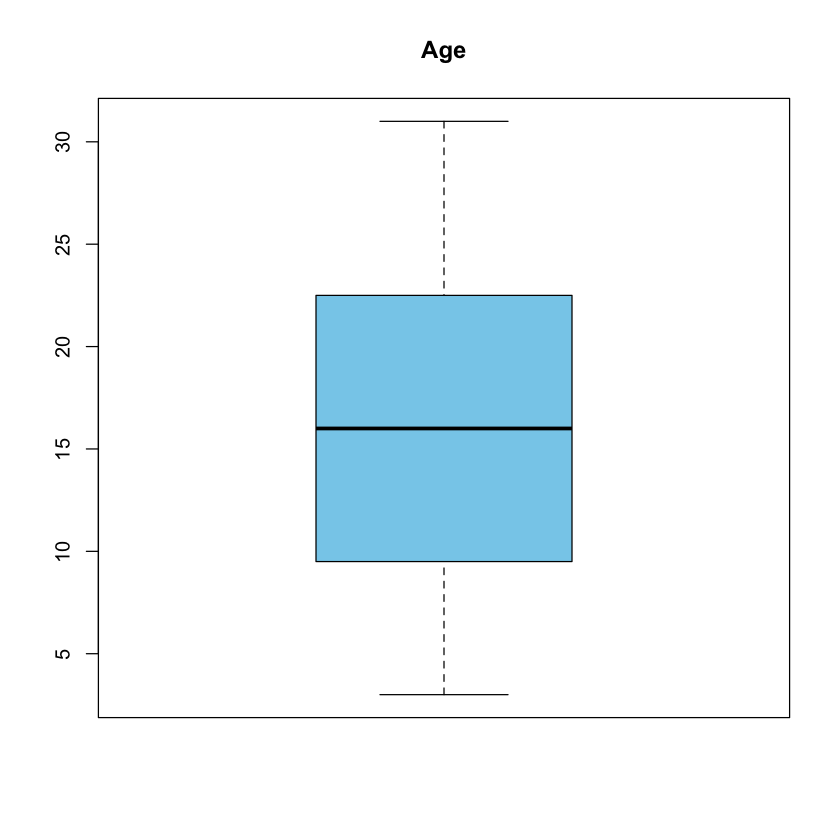

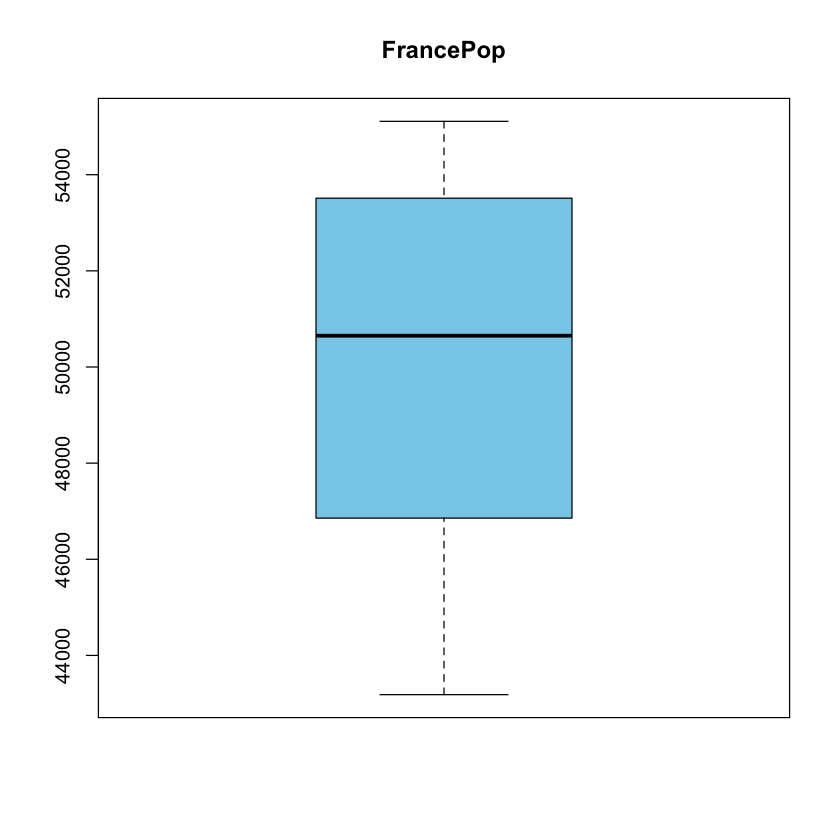

In [8]:
# Boxplot cho từng biến trên khác biểu đồ
for (col in colnames(wine)) {
    # options(repr.plot.width=10, repr.plot.height=7)
    boxplot(wine[[col]], col = "skyblue", main = col)
}


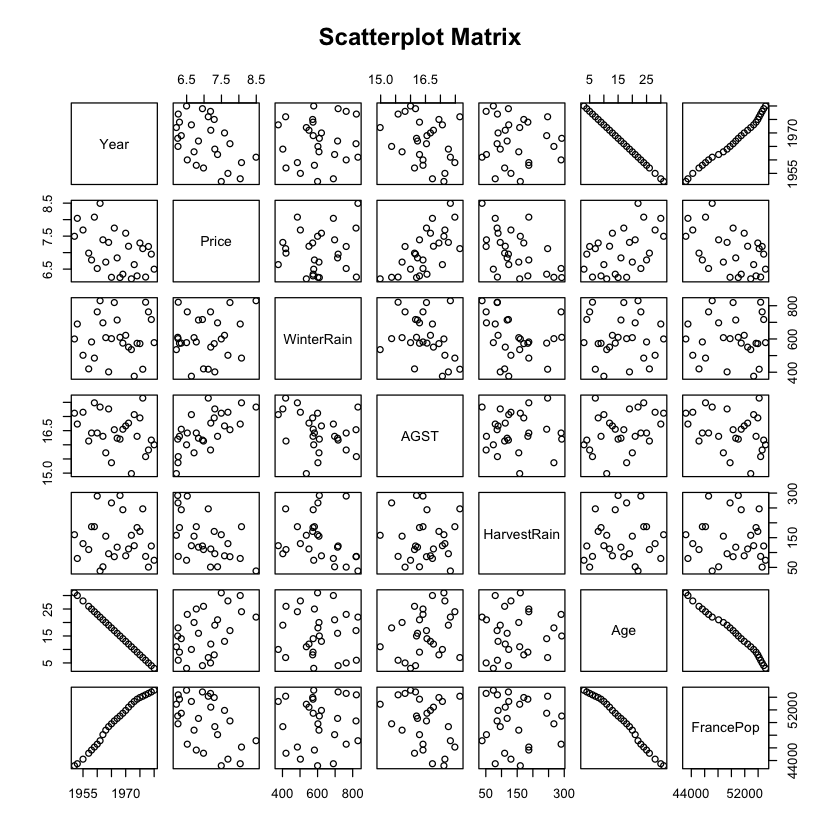

In [9]:
# Vẽ biểu đồ Scatterplot cho toàn bộ các cột dữ liệu
pairs(wine, main = "Scatterplot Matrix")


In [10]:
cor_matrix <- cor(wine)
cor_matrix

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,1.00000000,-0.4604087,0.05118354,-0.29488335,-0.05884976,-1.00000000,0.99227908
Price,-0.46040873,1.0000000,0.13488004,0.66752483,-0.50718463,0.46040873,-0.48107195
WinterRain,0.05118354,0.1348800,1.00000000,-0.32113230,-0.26798907,-0.05118354,0.02945091
AGST,-0.29488335,0.6675248,-0.32113230,1.00000000,-0.02708361,0.29488335,-0.30126148
HarvestRain,-0.05884976,-0.5071846,-0.26798907,-0.02708361,1.00000000,0.05884976,-0.03201463
Age,-1.00000000,0.4604087,-0.05118354,0.29488335,0.05884976,1.00000000,-0.99227908
FrancePop,0.99227908,-0.4810720,0.02945091,-0.30126148,-0.03201463,-0.99227908,1.00000000


In [11]:
mean(cor_matrix[,6]) # Hệ số tương quan trung bình của Age với các biến khác
mean(cor_matrix[,7]) # Hệ số tương quan trung bình của FrancePop với các biến khác

[1] -0.03276011

[1] 0.03072898

- Dựa vào sctatter plot và ma trận hệ số tương quan, ta nhận thấy rằng tồn tại hiện tượng đa cộng tuyến giữa các biến: Year, Age và FrancePop.
- Year là một biến có yếu tố phân loại, nên có thể loại bỏ biến này khỏi bộ dữ liệu.
- Đối với hai biến Age và FrancePop, ta thấy Age có hệ số tương quan trung bình với các biên khác lớn hơn so với FrancePop, do đó ta có thể loại bỏ biến này ra khỏi bộ dữ liệu 

In [12]:
# Xét bộ dữ liệu mới sau khi đã loại bỏ 2 cột Year và Age
df = wine[, c("Price", "WinterRain","AGST", "HarvestRain", "FrancePop")]

In [13]:
## Phân chia bộ dữ liệu thành 2 tập train.data và test.data
set.seed(42)
sample <- sample(c(TRUE, FALSE), nrow(df), replace=TRUE, prob=c(0.8,0.2))
train.data  <- df[sample, ]
test.data   <- df[!sample, ]
dim(train.data)
dim(test.data)

[1] 18  5

[1] 9 5

In [14]:
# Build the model
model <- lm(Price ~., data = train.data)
summary(model)


Call:
lm(formula = Price ~ ., data = train.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38028 -0.23346  0.04538  0.17777  0.56745 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.386e-02  3.090e+00  -0.011 0.991424    
WinterRain   1.268e-03  6.238e-04   2.033 0.062961 .  
AGST         5.604e-01  1.256e-01   4.461 0.000641 ***
HarvestRain -3.526e-03  1.045e-03  -3.373 0.004994 ** 
FrancePop   -4.793e-05  2.441e-05  -1.963 0.071386 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2966 on 13 degrees of freedom
Multiple R-squared:  0.8317,	Adjusted R-squared:  0.7799 
F-statistic: 16.06 on 4 and 13 DF,  p-value: 5.968e-05


#### NHẬN XÉT:
- Residuals (Sai số):
    - Min: Giá trị nhỏ nhất của các sai số. Trong trường hợp này, là -0.38028.
    - 1Q: Giá trị ở phân vị 25% của các sai số, tức là 25% của các sai số nhỏ hơn giá trị này. Trong trường hợp này, là -0.23346.
    - Median (Trung vị): Giá trị ở phân vị 50% của các sai số, tức là giá trị ở giữa khi sắp xếp các sai số theo thứ tự tăng dần. Trong trường hợp này, là 0.04538.
    - 3Q: Giá trị ở phân vị 75% của các sai số, tức là 75% của các sai số nhỏ hơn giá trị này. Trong trường hợp này, là 0.17777.
    - Max: Giá trị lớn nhất của các sai số. Trong trường hợp này, là 0.56745.
- Coefficients (Hệ số ước lượng):
    - Estimate (Ước lượng): Giá trị ước lượng của hệ số cho mỗi biến độc lập. Ví dụ, giá trị ước lượng cho biến "WinterRain" là 1.268e-03. Trong trường hợp này chúng ta có thể xây dựng được công thức hồi quy của Price như sau: Price = -3.386e-02 + 1.268e-03*WinterRain + 5.604e-01*AGST - 3.526e-03*HarvestRain - 4.793e-05*FrancePop
    - Std. Error (Sai số chuẩn): Đo lường mức độ biến động của ước lượng. Trong trường hợp này, biến "WinterRain" có sai số chuẩn là 6.238e-04.
    - t value (Giá trị thống kê t): Đo lường mức độ mà ước lượng của một hệ số khác biệt với không. Giá trị càng cao, hệ số càng có ý nghĩa thống kê. Trong trường hợp này, biến "WinterRain" có giá trị t là 2.033.
    - Pr(>|t|) (Giá trị p) (p value của kiểm định Student của từng hệ số hồi quy): Đo lường mức độ ý nghĩa thống kê của ước lượng. Giá trị p càng nhỏ, hệ số càng có ý nghĩa thống kê. Trong trường hợp này, giá trị p của biến:
        - "WinterRain" là 0.062961, cho thấy mức ý nghĩa thống kê là khá cao (nhỏ hơn 0.1 và > 0.05) nên có thể chấp nhận giả thuyết H0 với mức ý nghĩa alpha = 0.05 (có thể bác bỏ H0 trong trường hợp alpha = 0.1) 
        - AGST có p giá trị 0.000641 bác bỏ giả thuyết H0 với mức ý nghĩa alpha = 0.05
        - HarvestRain có p giá trị 0.004994 bác bỏ giả thuyết H0 với mức ý nghĩa alpha = 0.05
        - FrancePop có p giá trị 0.071386 có thể chấp nhận giả thuyết H0 với mức ý nghĩa alpha = 0.05 (có thể bác bỏ H0 trong trường hợp alpha = 0.1) 

- Multiple R-squared:  0.8317: Price được giải thích 83.17% trên tổng biến thiên bằng cách sử dụng các biến WinterRain, AGST, HarvestRain và FrancePop. 16.83% biến thiên còn lại của Price được giải thích bởi một thành phần khác chưa biết
- Đối với kết quả của Kiểm định Fisher: F-statistic: 16.06 on 4 and 13 DF,  p-value: 5.968e-05
Giá trị p value rất nhỏ nên chúng ta có thể bác bỏ giả thuyết H0, có nghĩa là bác bỏ giả thuyết Các hệ số beta đồng thời bằng không

In [15]:
# Build the model cho 3 biến 
model3 <- lm(Price ~AGST +HarvestRain+WinterRain, data = train.data)
summary(model3)


Call:
lm(formula = Price ~ AGST + HarvestRain + WinterRain, data = train.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52994 -0.19823 -0.01299  0.21697  0.63615 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.676546   2.182056  -2.143   0.0501 .  
AGST         0.680304   0.120422   5.649    6e-05 ***
HarvestRain -0.002750   0.001062  -2.590   0.0214 *  
WinterRain   0.001518   0.000670   2.266   0.0398 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3255 on 14 degrees of freedom
Multiple R-squared:  0.7818,	Adjusted R-squared:  0.7351 
F-statistic: 16.72 on 3 and 14 DF,  p-value: 6.648e-05


In [16]:
# ## Fisher partial test
anova(model, model3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,13,1.144004,NA,NA,NA,NA
2,14,1.483155,-1,-0.339151,3.853977,0.07138644


- Trong bảng anova so sánh sự khác nhau giữa hai mô hình cho thấy rằng, giá trị p cho cột thứ hai là 0.07138644,lớn hơn mức ý nghĩa alpha = 0.05 ngụ ý rằng việc loại bỏ FrancePop đã được thực hiện trong mô hình thứ hai có ý nghĩa thống kê đối với sự khác biệt trong hiệu suất của các mô hình.

- Lựa chon model3 với 3 biến AGST, AGST, WinterRain là phù hợp với bài toán này

In [17]:
# Thực hiện dự đoán
predictions <- model3 %>% predict(test.data)

In [18]:
predict(model2, newdata =test.data , interval = "confidence", level=0.99)
predict(model2, newdata =test.data , interval = "prediction", level=0.99)

ERROR: Error in eval(expr, envir, enclos): object 'model2' not found


In [ ]:
ss=RMSE(predictions, test.data$Price)
ss

[1] 0.287177